<a href="https://colab.research.google.com/github/sorayabailey23/Group-93/blob/main/Team_93_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 93: Exploratory Data Analysis 

To create our gentrification index, we will complete exploratory data anaylsis on LA County Assessor Rolls (2010 - 2020) to see how rail transit stations affect property values. 









In [ ]:
#importing libraries + drive

!pip install pingouin

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import pingouin as pg
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()#sets seaborn theme parameters to their defaults

## LA County Assessor Data 



In [4]:
#loading assessor data 
df = pd.read_csv("gdrive/My Drive/Team 93 Capstone Project/data/Assessor_Parcels_Data_2010 to 2020.csv")
df

,Unnamed: 0,Unnamed: 0.1,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,0,0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441.0,91604,1
1,1,1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830.0,90035,0
2,2,2,LOS ANGELES,2010,5013-019-033-2010,Commercial,Commercial,303510.0,90043,0
3,3,3,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000.0,91364,0
4,4,4,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877.0,91335,0
...,...,...,...,...,...,...,...,...,...,...
8310935,8310935,8310935,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430.0,90732,0
8310936,8310936,8310936,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377.0,90732,0
8310937,8310937,8310937,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726.0,90732,0
8310938,8310938,8310938,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073.0,90732,0


### Feature Engineering 

To have a consistent list of zip codes across all datasets, we will filter the assessor dataset to 76 Los Angeles city zip codes. Additionally, we'll do feature engineering and create the following: 


*   A new feature that details the geographical (North, Northwest, West, South, and Central) location.
*   A feaure that details the total number of rail transit stations in the location's zip code



In [ ]:
#dictionary of zip codes + their station count for feature engineering

station_zip_codes = {
    '90004' : 1,
    '90006' : 0,
    '90007' : 4,
    '90012' : 2,
    '90013' : 2,
    '90015' : 1,
    '90016' : 3,
    '90017' : 1,
    '90019' : 0,
    '90020' : 1,
    '90024' : 0,
    '90026' : 0,
    '90027' : 2,
    '90028' : 2,
    '90029' : 1,
    '90034' : 1,
    '90035' : 0,
    '90036' : 0,
    '90037' : 0,
    '90038': 0,
    '90039' : 0,
    '90041' : 0,
    '90042' : 1,
    '90045' : 1,
    '90064' : 3,
    '90065' : 1,
    '90068' : 0,
    '90094' : 0,
    '90211' : 0,
    '90212' : 0,
    '90272' : 0,
    '90731' : 0,
    '90732' : 0,
    '91303' : 0,
    '91306' : 0,
    '91307' : 0,
    '91316' : 0,
    '91324' : 0,
    '91325' : 0,
    '91335' : 0,
    '91343' : 0,
    '91344' : 0,
    '91356' : 0,
    '91367' : 0,
    '91401' : 0,
    '91403' : 0,
    '91405' : 0,
    '91406' : 0,
    '91411' : 0,
    '91423' : 0,
    '91601' : 1,
    '91604' : 1,
    '91605' : 0,
    '91606' : 0,
    '91607' : 0,
    '90025' : 0,
    '90046' : 0,
    '90047' : 0,
    '90048' : 2,
    '90049' : 0,
    '90066' : 0,
    '90069' : 0,
    '90210' : 0,
    '90230' : 0,
    '90245' : 0,
    '90291' : 0,
    '90292' : 0,
    '90293' : 0,
    '90501' : 0,
    '90717' : 0,
    '91214' : 0,
    '91304' : 0,
    '91311' : 0,
    '91342' : 0,
    '91364' : 0,
    '91505' : 0
}

#dictionary of each zip code's geographic locaition

area_zip_codes = {
    '90004' : 'West',
    '90006' : 'Central',
    '90007' : 'Central',
    '90012' : 'Central',
    '90013' : 'Central',
    '90015' : 'Central',
    '90016' : 'West',
    '90017' : 'Central',
    '90019' : 'West',
    '90020' : 'West',
    '90024' : 'West',
    '90026' : 'Central',
    '90027' : 'Central',
    '90028' : 'West',
    '90029' : 'Central',
    '90034' : 'West',
    '90035' : 'West',
    '90036' : 'West',
    '90037' : 'Central',
    '90038' : 'West',
    '90039' : 'Central',
    '90041' : 'Central',
    '90042' : 'Central',
    '90045' : 'West',
    '90064' : 'West',
    '90065' : 'Central',
    '90068' : 'West',
    '90094' : 'West',
    '90211' : 'West',
    '90212' : 'West',
    '90272' : 'West',
    '90731' : 'South',
    '90732' : 'South',
    '91303' : 'Northwest',
    '91306' : 'Northwest',
    '91307' : 'Northwest',
    '91316' : 'Northwest',
    '91324' : 'Northwest',
    '91325' : 'Northwest',
    '91335' : 'Northwest',
    '91343' : 'Northwest',
    '91344' : 'Northwest',
    '91356' : 'Northwest',
    '91367' : 'Northwest',
    '91401' : 'Northeast',
    '91403' : 'Northeast',
    '91405' : 'Northeast',
    '91406' : 'Northwest',
    '91411' : 'Northeast',
    '91423' : 'Northeast',
    '91601' : 'Northeast',
    '91604' : 'Northeast',
    '91605' : 'Northeast',
    '91606' : 'Northeast',
    '91607' : 'Northeast',
    '90025' : 'West',
    '90046' : 'West',
    '90047' : 'West',
    '90048' : 'West',
    '90049' : 'West',
    '90066' : 'West',
    '90069' : 'West',
    '90210' : 'West',
    '90230' : 'West',
    '90245' : 'West',
    '90291' : 'West',
    '90292' : 'West',
    '90293' : 'West',
    '90501' : 'South',
    '90717' : 'South',
    '91214' : 'Northeast',
    '91304' : 'Northwest',
    '91311' : 'Northwest',
    '91342' : 'Northeast',
    '91364' : 'Northeast',
    '91505' : 'Northeast'
}

In [ ]:
#filter dataframe to only include the list of zipcodes above

assessor_data = df[df['zip_code'].isin(list(station_zip_codes.keys()))]
assessor_data

,Unnamed: 0,Unnamed: 0.1,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,0,0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441.0,91604,1
1,1,1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830.0,90035,0
3,3,3,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000.0,91364,0
4,4,4,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877.0,91335,0
5,5,5,LOS ANGELES,2010,2132-013-016-2010,Residential,Single Family Residence,248779.0,91335,0
...,...,...,...,...,...,...,...,...,...,...
8310935,8310935,8310935,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430.0,90732,0
8310936,8310936,8310936,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377.0,90732,0
8310937,8310937,8310937,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726.0,90732,0
8310938,8310938,8310938,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073.0,90732,0


In [ ]:
assessor_data = assessor_data.reset_index()
assessor_data = assessor_data.drop(columns = ["index","Unnamed: 0", "Unnamed: 0.1"])

In [ ]:
assessor_data

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441.0,91604,1
1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830.0,90035,0
2,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000.0,91364,0
3,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877.0,91335,0
4,LOS ANGELES,2010,2132-013-016-2010,Residential,Single Family Residence,248779.0,91335,0
...,...,...,...,...,...,...,...,...
5952765,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430.0,90732,0
5952766,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377.0,90732,0
5952767,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726.0,90732,0
5952768,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073.0,90732,0


In [ ]:
#changing data types for consistency

assessor_data["year"] = assessor_data["year"].astype("str")
assessor_data["zip_code"] = assessor_data["zip_code"].astype("str")
assessor_data["train_stops"] = assessor_data["train_stops"].astype("category")
assessor_data["net_value"] = assessor_data["net_value"].astype("int")

In [ ]:
#adding area column 

def find_area(x):
  if x in area_zip_codes.keys():
    return area_zip_codes[x] 

assessor_data['area']= assessor_data["zip_code"].apply(lambda x: find_area(x))

In [ ]:
assessor_data

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops,area
0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441,91604,1,Northeast
1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830,90035,0,West
2,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000,91364,0,Northeast
3,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877,91335,0,Northwest
4,LOS ANGELES,2010,2132-013-016-2010,Residential,Single Family Residence,248779,91335,0,Northwest
...,...,...,...,...,...,...,...,...,...
5952765,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430,90732,0,South
5952766,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377,90732,0,South
5952767,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726,90732,0,South
5952768,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073,90732,0,South


###Exploratory Data Analysis



### Univariate Analysis: Net Property Values Across All Zip Codes

First, we'll examine summary statistics to better understand the spread of the data across the entire dataset. Then, we'll create separate subsets of the data to rule out Simpson's Paradox. Since we are interested in gentrification and displacement of small businesses and local residents, we will creating a subsest of the assessor data that looks only at commerical, industrial, residential, and institutional properties.

In [ ]:
properties = ['Commercial', 'Industrial', 'Residential', 'Institutional']
assessor_data = assessor_data[assessor_data['general_use'].isin(properties)]
assessor_data

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops,area
0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441,91604,1,Northeast
1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830,90035,0,West
2,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000,91364,0,Northeast
3,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877,91335,0,Northwest
4,LOS ANGELES,2010,2132-013-016-2010,Residential,Single Family Residence,248779,91335,0,Northwest
...,...,...,...,...,...,...,...,...,...
5952765,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430,90732,0,South
5952766,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377,90732,0,South
5952767,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726,90732,0,South
5952768,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073,90732,0,South


### Analysis: Examining by Rail Transist Stops Only

We will use the groupby function to see how rail stations along affect property value. 


In [ ]:
df_spread1 = assessor_data.groupby("train_stops").describe()
df_spread1

net_value                ...                        
                 count          mean  ...        75%          max
train_stops                           ...                        
0            4595982.0  6.471058e+05  ...  614237.25  835387855.0
1             860930.0  7.555079e+05  ...  667507.00  502747279.0
2             231170.0  1.192703e+06  ...  896000.00  873760476.0
3             199417.0  6.286873e+05  ...  645436.00  448058019.0
4              43644.0  6.976946e+05  ...  523603.00  563204485.0

[5 rows x 8 columns]

We'll visualize this spread with a boxplox, removing outliers so that it is easier to read. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Property Net Values')

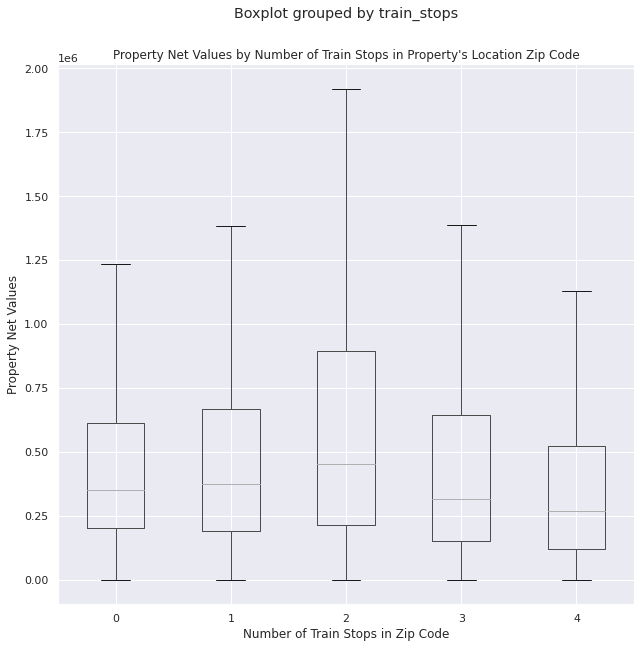

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)

assessor_data.boxplot(column = "net_value", by=["train_stops"], ax=ax, showfliers=False)
plt.title("Property Net Values by Number of Train Stops in Property's Location Zip Code")
plt.xlabel("Number of Train Stops in Zip Code")
plt.ylabel("Property Net Values")

According to `df_spread1` and the boxplot above, properties in zip codes with 1 or 2 rail trainsit stops have a higher net value than properties in zip codes with no stops. However, this does not seem to be the case for zip codes with 3 or 4 train stops. After examining our station_zip_codes dictionary, there is a very limited amount of zip codes with greater than 2 stops, which could be causing this difference. 

Since we did not account for outliers in the above box plot, we'll do a strip plot to get an idea of the whole spread. 

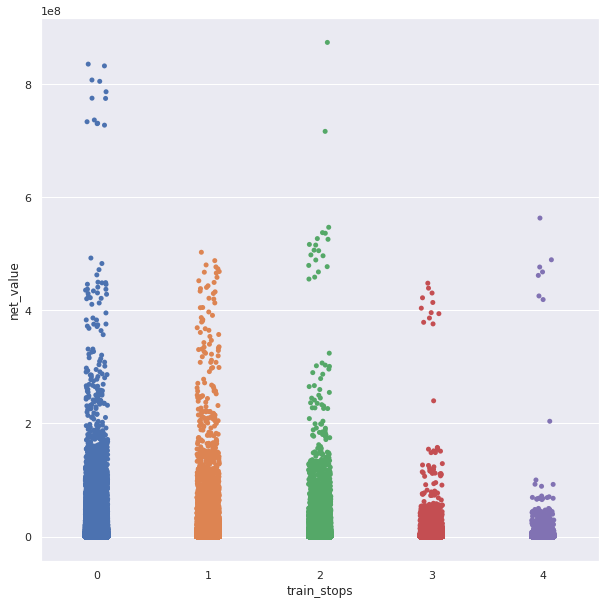

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.stripplot(x=assessor_data['train_stops'], y=assessor_data['net_value'], ax=ax)

Zip codes with 1 and 2 train stops have a higher mean and median property value than zip codes with 0, but they seem to have a similar spread even when including outliers. 

### Analysis: Examining by Rail Transist Stops, Property Type, Year, and Location

To ensure that this is not a case of Simpson's paradox, we'll examine the summary statistics and complete visualizations that group by rail transit stops + property type and  rail transit stops + year. Finally, we'll account for the geographical location. 

In [ ]:
#computing summary statistics 

assessor_data.groupby(["train_stops", "general_use"]).describe()

net_value                ...                         
                               count          mean  ...         75%          max
train_stops general_use                             ...                         
0           Commercial      160134.0  2.242975e+06  ...  1530000.00  786522000.0
            Industrial       53103.0  2.219301e+06  ...  1860884.00  835387855.0
            Institutional    16060.0  1.293461e+06  ...   650346.25  141518481.0
            Residential    4366685.0  5.670859e+05  ...   592000.00  372167588.0
1           Commercial       61392.0  2.697778e+06  ...  1285620.00  502747279.0
            Industrial       13177.0  1.834075e+06  ...  1520173.00  143692829.0
            Institutional     4353.0  1.119127e+06  ...   619284.00  117740000.0
            Residential     782008.0  5.828307e+05  ...   638700.00  438405496.0
2           Commercial       26651.0  3.781548e+06  ...  2189110.50  546883675.0
            Industrial        5528.0  2.165449e+06  ...  1874244.25  227727230.0
            Institutional     1817.0  3.480781e+06  ...   799885.00  873760476.0
            Residential     197174.0  7.944251e+05  ...   799989.75  233232450.0
3           Commercial       11360.0  2.108596e+06  ...  1256854.00  240069423.0
            Industrial        4427.0  2.812349e+06  ...  1427559.50  448058019.0
            Institutional      939.0  5.812910e+05  ...   378934.50   26343384.0
            Residential     182691.0  4.839931e+05  ...   615400.00  115417773.0
4           Commercial        5088.0  1.446524e+06  ...   887156.75  203920958.0
            Industrial        4730.0  8.993087e+05  ...  1034785.00   29651400.0
            Institutional      833.0  1.721859e+06  ...   274575.00  563204485.0
            Residential      32993.0  5.274522e+05  ...   430174.00  489432023.0

[20 rows x 8 columns]

Visualizing with a  boxplot that represents the distribution of property values from 2010 to 2020 by train_stop status. 

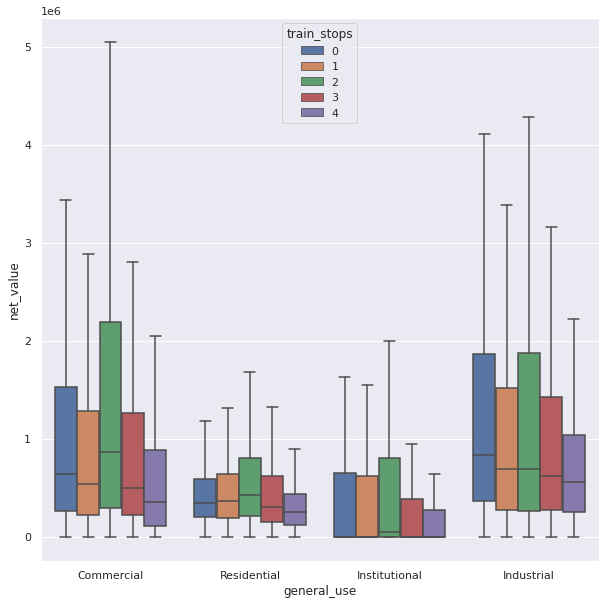

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="general_use", y='net_value', hue="train_stops", data=assessor_data, showfliers=False)

From this graph, we see that for commercial and residential properties, the median and mean of property values is higher for zip codes with 2 stops. However, this trend is not consistent for zip codes with 1 train stop.

###Group by train stops and year 

So far our anaylsis has not considered how property values have changes over time. We will now graph the mean property value for all types from 2010 to 2020.

In [ ]:
line_graph_time= assessor_data.groupby(by=["year", "train_stops"]).mean().reset_index()

In [ ]:
line_graph_time

,year,train_stops,net_value
0,2010,0,5.066497e+05
1,2010,1,5.667256e+05
2,2010,2,8.698168e+05
3,2010,3,4.894958e+05
4,2010,4,4.834206e+05
5,2011,0,5.159691e+05
6,2011,1,5.742319e+05
7,2011,2,8.660406e+05
8,2011,3,4.968023e+05
9,2011,4,4.972439e+05


Text(0, 0.5, 'Average Net Property Value')

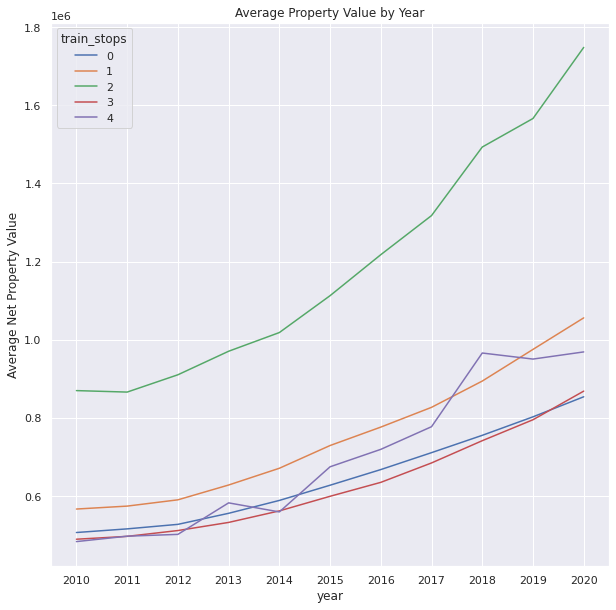

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=df["year"], y=df["net_value"], hue=df["train_stops"], ax=ax)
plt.title("Average Property Value by Year")
plt.ylabel("Average Net Property Value")

Our line graph shows that the average property value for zip codes with 2 stops and 1 stop have been higher than those with no stops. The average for 2 and 1 stops also seems to have a steeper slope than the 1 stop line, which could mean that the rate of increase is highe - however, this will need to be verified with further analysis. 

### Analysis: Accounting for Area 

Like many US cities, different areas of the city have different economic profiles. For example, West Los Angeles, which includes UCLA/Westwood, Beverly Hills adjacent neighborhoods, and beach neighborhoods, is considerably more wealthy than most other areas of the city. 


Therefore, when considering the geographical location of a zip code is also important to consider. We have included an area feature in our data to group together zip codes that would likely have similar confounder variables that we are not aware. 


First - we'll create  box plot of the full assessor data to compare the spread among the different areas. Then, we'll create a facetgrid of line graphs to visualize how avgerage property value has changed over time for each area and train stop status. 


Text(0.5, 1.0, 'Property Value per Area')

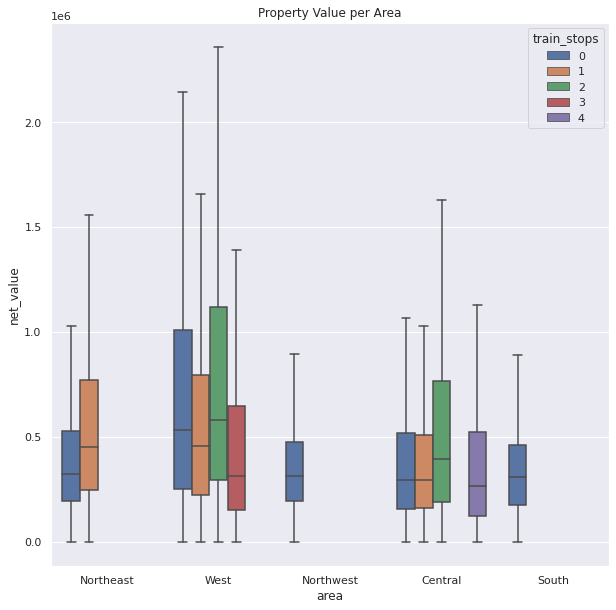

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="area", y='net_value', hue="train_stops", data=assessor_data, showfliers=False)
plt.title("Property Value per Area")

In [ ]:
line_graph= assessor_data.groupby(by=["year","area", "train_stops"]).mean().reset_index().dropna()
line_graph

,year,area,train_stops,net_value
0,2010,Central,0,3.413052e+05
1,2010,Central,1,4.853160e+05
2,2010,Central,2,7.202682e+05
4,2010,Central,4,4.834206e+05
5,2010,Northeast,0,4.159616e+05
...,...,...,...,...
265,2020,South,0,5.229399e+05
270,2020,West,0,1.347977e+06
271,2020,West,1,1.100942e+06
272,2020,West,2,2.487256e+06


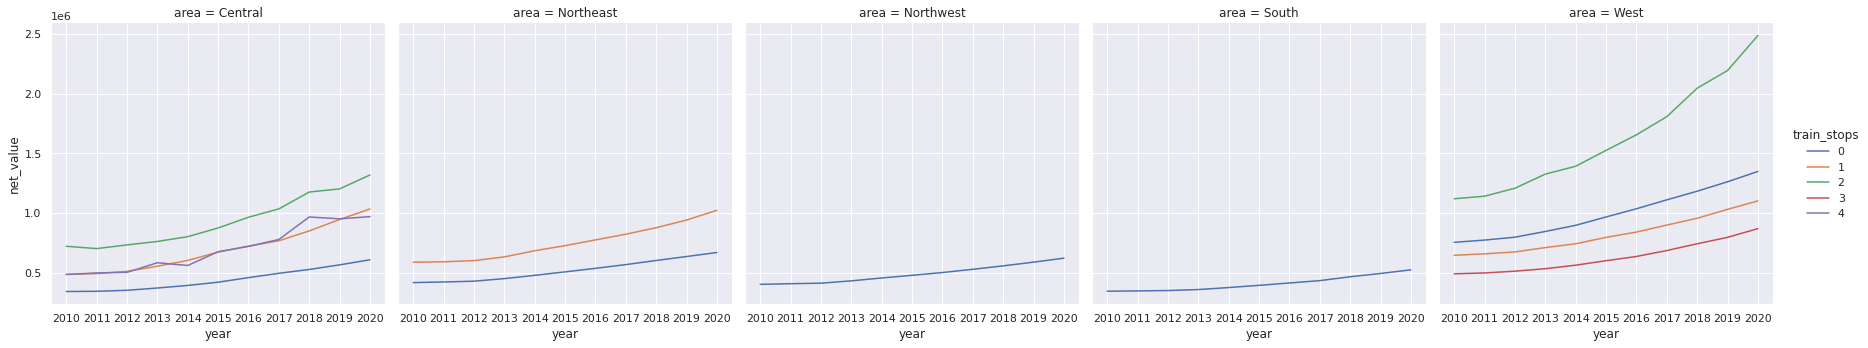

In [ ]:
g = sns.FacetGrid(line_graph, col='area', hue='train_stops', height=5)
g.map(sns.lineplot, "year","net_value")
g.add_legend()

###Commercial Properties 

Transit orientated development encourages the develop of multi-family housing and commercial buildings near rail transit stops. As such, we will do a deeeper dive to see how residential and commercial property values near rail stops compare to those not near transit hubs. 

In [ ]:
#creating a subset df w/ commercial properties only 
commercial= assessor_data[assessor_data["general_use"]=="Commercial"]
commercial

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops,area
0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441,91604,1,Northeast
1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830,90035,0,West
2,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000,91364,0,Northeast
337,LOS ANGELES,2010,2134-001-015-2010,Commercial,Store,130655,91306,0,Northwest
359,LOS ANGELES,2010,2134-002-020-2010,Commercial,"Auto, Recreation Equipment, Construction Equip...",321916,91306,0,Northwest
...,...,...,...,...,...,...,...,...,...
5950084,LOS ANGELES,2020,7562-017-017-2020,Commercial,"Shopping Center (Neighborhood, Community)",2695429,90732,0,South
5950680,LOS ANGELES,2020,7562-005-013-2020,Commercial,Store,499154,90732,0,South
5951473,LOS ANGELES,2020,7563-016-018-2020,Commercial,"Bank, Savings and Loan",4713283,90732,0,South
5951677,LOS ANGELES,2020,7563-016-016-2020,Commercial,"Shopping Center (Neighborhood, Community)",3772820,90732,0,South


Cleaning up some features in the data 

In [ ]:
commercial = commercial.reset_index().drop(columns = ["index"])

In [ ]:
commercial

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops,area
0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441,91604,1,Northeast
1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830,90035,0,West
2,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000,91364,0,Northeast
3,LOS ANGELES,2010,2134-001-015-2010,Commercial,Store,130655,91306,0,Northwest
4,LOS ANGELES,2010,2134-002-020-2010,Commercial,"Auto, Recreation Equipment, Construction Equip...",321916,91306,0,Northwest
...,...,...,...,...,...,...,...,...,...
264620,LOS ANGELES,2020,7562-017-017-2020,Commercial,"Shopping Center (Neighborhood, Community)",2695429,90732,0,South
264621,LOS ANGELES,2020,7562-005-013-2020,Commercial,Store,499154,90732,0,South
264622,LOS ANGELES,2020,7563-016-018-2020,Commercial,"Bank, Savings and Loan",4713283,90732,0,South
264623,LOS ANGELES,2020,7563-016-016-2020,Commercial,"Shopping Center (Neighborhood, Community)",3772820,90732,0,South


I'll start by describing the data - its spread, count, etc. 

In [ ]:
commercial.describe()

,net_value
count,2.646250e+05
mean,2.482359e+06
std,1.261323e+07
min,0.000000e+00
25%,2.450000e+05
50%,6.118880e+05
75%,1.513654e+06
max,7.865220e+08


**Univariate analysis** - I'll first plot bar plots of the types of commercial properties in LA, then I'll plot boxplots of commercial properties by train stop status. 

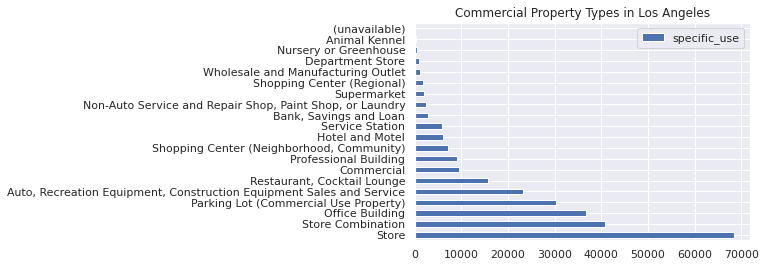

In [ ]:
#Exploring types of commercial properties in Los Angeles 
counts = commercial["specific_use"].value_counts().to_frame()
counts.plot(kind="barh")
plt.title("Commercial Property Types in Los Angeles")
plt.show()

Let's first look at the distribution of commercial values (without outliers) grouping by area and train stops. 

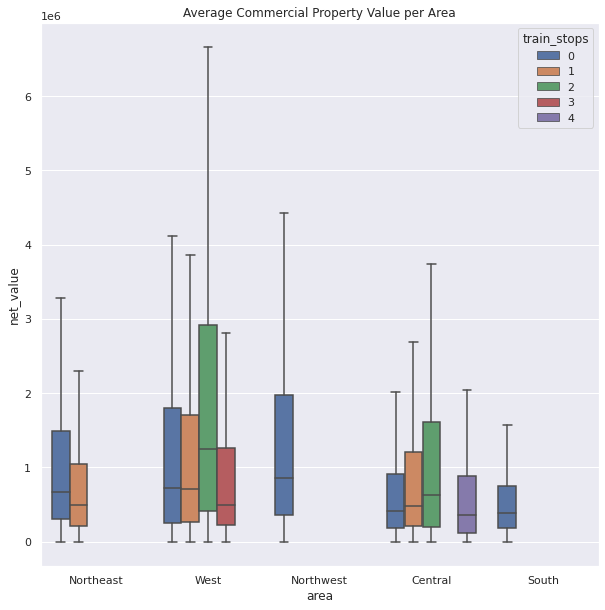

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="area", y='net_value', hue="train_stops", data=commercial, showfliers=False)
plt.title("Average Commercial Property Value per Area");

let's look over time 

In [ ]:
line_graph_commercial = commercial.groupby(by=["year","area", "train_stops"]).mean().reset_index().dropna()

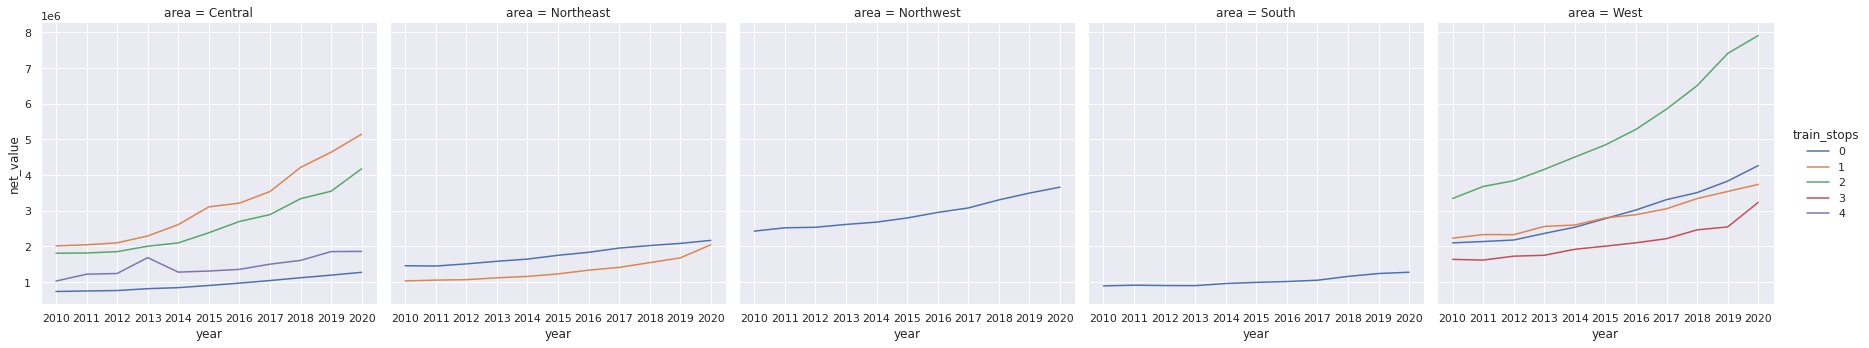

In [ ]:
g = sns.FacetGrid(line_graph_commercial, col='area', hue='train_stops', height=5)
g.map(sns.lineplot, "year","net_value")
g.add_legend()

###Residential Properties 

In [ ]:
#creating a subset df w/ commercial properties only 
residential= assessor_data[assessor_data["general_use"]=="Residential"].reset_index().drop(columns=['index'])
residential

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops,area
0,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877,91335,0,Northwest
1,LOS ANGELES,2010,2132-013-016-2010,Residential,Single Family Residence,248779,91335,0,Northwest
2,LOS ANGELES,2010,2132-008-016-2010,Residential,Single Family Residence,193608,91335,0,Northwest
3,LOS ANGELES,2010,2132-011-022-2010,Residential,Single Family Residence,77288,91335,0,Northwest
4,LOS ANGELES,2010,2132-009-033-2010,Residential,Single Family Residence,387700,91335,0,Northwest
...,...,...,...,...,...,...,...,...,...
5561546,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430,90732,0,South
5561547,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377,90732,0,South
5561548,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726,90732,0,South
5561549,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073,90732,0,South


In [ ]:
residential.describe()

,net_value
count,5.561551e+06
mean,5.743950e+05
std,1.808975e+06
min,0.000000e+00
25%,1.965220e+05
50%,3.490540e+05
75%,6.050000e+05
max,4.894320e+08


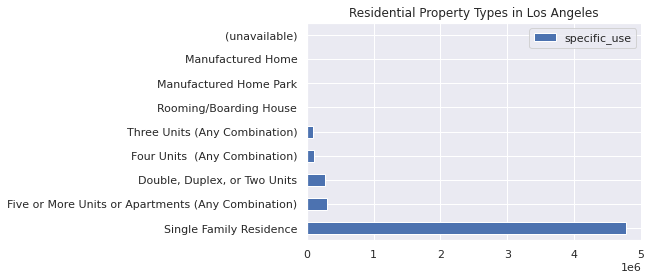

In [ ]:
counts = residential["specific_use"].value_counts().to_frame()
counts.plot(kind="barh")
plt.title("Residential Property Types in Los Angeles")
plt.show()

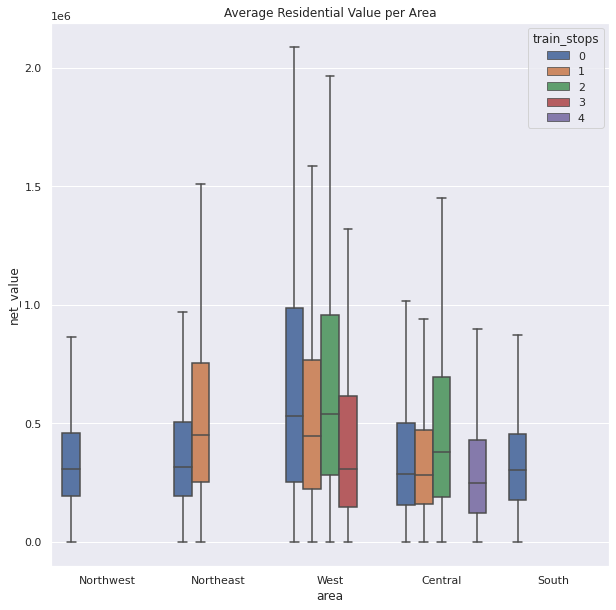

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="area", y='net_value', hue="train_stops", data=residential, showfliers=False)
plt.title("Average Residential Value per Area");

In [ ]:
line_graph_residential = residential.groupby(by=["year","area", "train_stops"]).mean().reset_index().dropna()


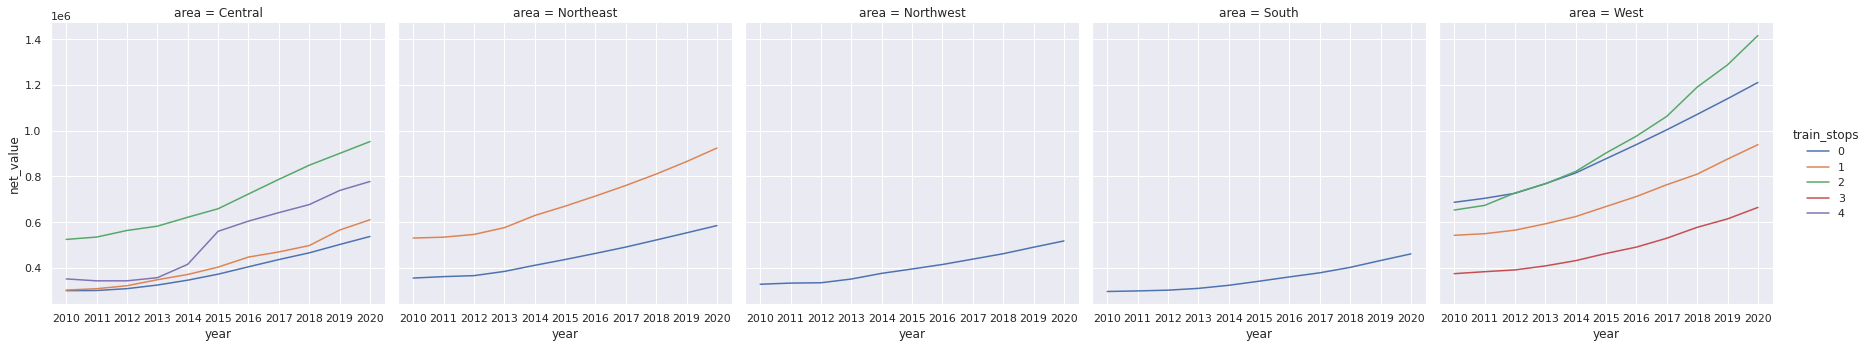

In [ ]:
g = sns.FacetGrid(line_graph_residential, col='area', hue='train_stops', height=5)
g.map(sns.lineplot, "year","net_value")
g.add_legend()

### Hypothesis Testing



Finally, we'll finish the Assessor data EDA with hypothesis testing. We will perform a t-test on three scenerios: 

**Test 1**

*   Null hypothesis: The mean of properties with 0 train_stops = mean of properties with 1 train stop
*   Alt hypothesis: The difference between the means is statistically significant. 

**Test 2**
*   Null hypothesis: The mean of properties with 0 train_stops = mean of properties with 2 train stops
*   Alt hypothesis: The difference between the means is statistically significant. 

**Test 3**
*   Null hypothesis: The mean of properties with 1 train_stops = mean of properties with 2 train stops
*   Alt hypothesis: The difference between the means is statistically significant.         


In [ ]:
#first scenerio - 0 train stops vs 1+ train stop 
sub1_no_stops= assessor_data[assessor_data["train_stops"].astype(int)==0]
sub2_no_stops= assessor_data[assessor_data["train_stops"].astype(int)>=1]



In [ ]:
pg.ttest(sub1_no_stops["net_value"], sub2_no_stops["net_value"])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-34.174609,1.578147e+06,two-sided,7.156693e-256,"[-172630.3, -153903.11]",0.045446,4.23e+250,1.0


In [ ]:
##second scenerio - 0 train stops vs 1 train stop 
sub3_no_stops= assessor_data[assessor_data["train_stops"].astype(int)==0]
sub4_no_stops= assessor_data[assessor_data["train_stops"].astype(int)==1]
pg.ttest(sub3_no_stops["net_value"], sub4_no_stops["net_value"])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-20.238617,983142.565868,two-sided,4.671554e-91,"[-118900.11, -97904.15]",0.032951,1.154e+86,1.0


In [ ]:
##second scenerio - 0 train stops vs 2 train stop 
sub5_no_stops= assessor_data[assessor_data["train_stops"].astype(int)==0]
sub6_no_stops= assessor_data[assessor_data["train_stops"].astype(int)==1]
pg.ttest(sub5_no_stops["net_value"], sub6_no_stops["net_value"])


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-20.238617,983142.565868,two-sided,4.671554e-91,"[-118900.11, -97904.15]",0.032951,1.154e+86,1.0


In [ ]:
##third scenerio - 1 train stops vs 2 train stop 
sub_1_stops= assessor_data[assessor_data["train_stops"].astype(int)==0]
sub_2_stops= assessor_data[assessor_data["train_stops"].astype(int)==1]
pg.ttest(sub_1_stops["net_value"], sub_2_stops["net_value"])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-20.238617,983142.565868,two-sided,4.671554e-91,"[-118900.11, -97904.15]",0.032951,1.154e+86,1.0


With a significant level of .05, we reject the null in all three scenerios. The mean property values are statistically signficant. 